<a href="https://colab.research.google.com/github/rsmrqz/Procesamiento-de-Nube-de-Puntos/blob/main/PNP_Tarea_2_RSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="display: flex; justify-content: space-between; align-items: center;">
    <div>
        <h6>Procesamiento de Nube de Puntos</h6>
    </div>
    <div>
        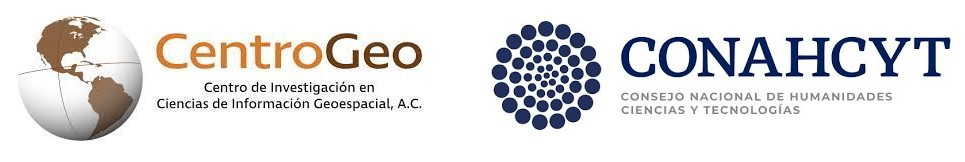
    </div>
</div>

<div align="center">
<h1>Centro de Investigación en Ciencias de Información Geoespacial, A.C.</h1>
</div>

<div align="center">
Raúl Sánchez Márquez <br>
al.rsanchez@centrogeo.edu.mx <br>
Observación de la Tierra <br>

Tarea 2: Parámetros Intrínsecos Exif <br>

15 de junio de 2024
</div>

<h2>Introducción</h2>

<div style="text-align: justify;">
EXIF (Exchangeable Image File Format) es un estándar que especifica los formatos de archivos de imágenes utilizados por las cámaras digitales (incluyendo teléfonos inteligentes) y otros sistemas de captura de imágenes. Los datos EXIF se incrustan en los archivos de imagen y proporcionan información sobre cómo y cuándo se capturó la imagen, así como las configuraciones de la cámara utilizadas en el momento de la captura. <br>
Los datos EXIF son útiles para fotógrafos, investigadores y cualquier persona interesada en los detalles técnicos de una imagen. Pueden ayudar a mejorar las habilidades fotográficas al analizar las configuraciones que produjeron una imagen particular.
<br>
En este documento, utilizamos la librería `exifread` para extraer y analizar los datos EXIF de una imagen. A continuación, se presenta el código utilizado para realizar esta tarea, junto con una explicación detallada de los pasos y los resultados obtenidos.
</div>

<h2> Desarrollo </h2>

<div style="text-align: justify;">
El código comienza instalando el paquete exifread, necesario para leer los datos EXIF de las imágenes.
</div>

In [ ]:
# Instalación del paquete exifread para leer datos EXIF de imágenes
!pip install exifread

In [ ]:
import exifread

<div style="text-align: justify;">
Se abre la imagen especificada en modo binario y se procesan sus datos EXIF.
</div>

In [ ]:
# Abre la imagen en modo binario
with open("/content/drive/MyDrive/ProcNubes2024/RECURSOS/CALIBRACION/TestImageSPECT.TIF", 'rb') as f:
    tags = exifread.process_file(f)
    print(tags)

{'Image ImageWidth': (0x0100) Short=1280 @ 2458474, 'Image ImageLength': (0x0101) Short=960 @ 2458486, 'Image BitsPerSample': (0x0102) Short=16 @ 2458498, 'Image Compression': (0x0103) Short=Uncompressed @ 2458510, 'Image PhotometricInterpretation': (0x0106) Short=1 @ 2458522, 'Image ImageDescription': (0x010E) ASCII=550 nm @ 2458746, 'Image Make': (0x010F) ASCII=Parrot @ 2458754, 'Image Model': (0x0110) ASCII=Sequoia @ 2458762, 'Image StripOffsets': (0x0111) Long=8 @ 2458570, 'Image Orientation': (0x0112) Short=Rotated 180 @ 2458582, 'Image SamplesPerPixel': (0x0115) Short=1 @ 2458594, 'Image StripByteCounts': (0x0117) Long=2457600 @ 2458606, 'Image MinSampleValue': (0x0118) Short=0 @ 2458618, 'Image PlanarConfiguration': (0x011C) Short=1 @ 2458630, 'Image Software': (0x0131) ASCII=v1.4.1 @ 2458770, 'Image DateTime': (0x0132) ASCII=2017:08:19 23:11:40 @ 2458778, 'Image ApplicationNotes': (0x02BC) Byte=[] @ 2458866, 'Image ExifOffset': (0x8769) IFD=2457962 @ 2458678, 'GPS GPSVersionID'

<div style="text-align: justify;">
Campos de Interés: Aquí se definen los campos que se desean extraer de los datos EXIF.
</div>

In [ ]:
# Campos de interés
foi = [ #field of interest
    'EXIF FocalLength',
    'EXIF FocalPlaneXResolution',
    'EXIF FocalPlaneYResolution',
    'EXIF PrincipalPoint',
    'EXIF PerspectiveDistortion'
]

In [ ]:
# Extrae los campos relevantes
exif_results = {field: tags.get(field) for field in foi}

<h2> Resultados </h2>

<div style="text-align: justify;">
Mostrar los resultados iniciales.
</div>

In [ ]:
# Calcula y muestra los resultados en unidades de medida
for field, value in exif_results.items():
    print(f"{field}: {value}")

EXIF FocalLength: 2147483647/539568768
EXIF FocalPlaneXResolution: 2147483647/8053064
EXIF FocalPlaneYResolution: 2147483647/8053064
EXIF PrincipalPoint: None
EXIF PerspectiveDistortion: None


<div style="text-align: justify;">
Se define un diccionario para asignar unidades a los campos.
</div>

In [ ]:
# Diccionario para los campos con las unidades
units = {
    'EXIF FocalLength': 'mm',
    'EXIF FocalPlaneXResolution': 'pixels/mm',
    'EXIF FocalPlaneYResolution': 'pixels/mm',
    'EXIF PrincipalPoint': '',
    'EXIF PerspectiveDistortion': ''
}

<div style="text-align: justify;">
Se define una función para convertir los valores de los campos a sus unidades correspondientes.
</div>

In [ ]:
# Esta función convierte los valores EXIF a sus unidades correspondientes
def convert_to_units(value):
    try:
        if '/' in str(value):
            num, den = map(int, str(value).split('/'))
            return num / den
        return value
    except:
        return None

<div style="text-align: justify;">
Se calculan y muestran los valores convertidos junto con sus unidades correspondientes.
</div>

In [ ]:
# Calcula y muestra los resultados en unidades de medida
for field, value in exif_results.items():
    converted_value = convert_to_units(value)
    unit = units.get(field, '')
    if converted_value is not None:
        if unit:
            print(f"{field}: {converted_value:.2f} {unit}")
        else:
            print(f"{field}: {converted_value}")
    else:
        print(f"{field}: None")

EXIF FocalLength: 3.98 mm
EXIF FocalPlaneXResolution: 266.67 pixels/mm
EXIF FocalPlaneYResolution: 266.67 pixels/mm
EXIF PrincipalPoint: None
EXIF PerspectiveDistortion: None


<h2>Conclusión</h2>

<div style="text-align: justify;">
Estos resultados indican que la longitud focal de la cámara utilizada para capturar la imagen es de aproximadamente 3.98 mm, y la resolución de la plana focal es de aproximadamente 266.67 píxeles por milímetro tanto en el eje X como en el eje Y. Los campos Punto Principal y Distorsión de Perspectiva no contenían información en los datos EXIF de esta imagen en particular.
</div>

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/PNP_Tarea_2_RSM.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/PNP_Tarea_2_RSM.ipynb to html
[NbConvertApp] Writing 663209 bytes to /content/drive/MyDrive/Colab Notebooks/PNP_Tarea_2_RSM.html
